In [1]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from natsort import natsorted, ns

In [2]:
"""
A script to evaulate an experiment and create plots accoringly. 

"""

'\nA script to evaulate an experiment and create plots accoringly. \n\n'

In [3]:
#set experiment folder as root dir of this script
experiment_folder = "./data/follow_line"
os.chdir(experiment_folder)

In [4]:
#set hyperparameters 
num_generations = 240
population_size = 200
num_runs = 1


    

In [5]:
df = pd.DataFrame()
generation_identifiers = {}

for run in sorted(os.listdir(".")):
    if run[0].isdigit():
        #only use the run dirs 
        for filename in natsorted(os.listdir("./"+run+"/generations")):
            _generation_ids = pd.read_csv("./"+run+"/generations/"+filename+"/identifiers.txt", header=None)
            _generation_ids.rename({0: filename}, axis=1, inplace=True)
            if not f"{run}" in generation_identifiers:
                generation_identifiers[f"{run}"] = []
            generation_identifiers[f"{run}"].append(_generation_ids)

In [6]:
#contains the information about the phenotype ID of each generation
generation_identifiers['1'][0].head(3)

,generation_0
0,1
1,2
2,3


In [7]:
runs = {}
for run in range(1, num_runs+1):
    # cause run starts with 1 
    df = pd.DataFrame()
    for generation in range(num_generations):
        df = df.append(generation_identifiers[f"{run}"][generation][f"generation_{generation}"])
    runs[f"{run}"] = df

In [8]:
fitness_values = {}

for run in range(1, num_runs+1):
    fitness_values[f"{run}"] = pd.read_csv(f"{run}/data_fullevolution/fitness.csv", header=None)
    fitness_values[f"{run}"].rename({0:"Individual_ID", 1:"Distance to Target"}, axis=1, inplace=True)

In [9]:
fitness_values

{'1':        Individual_ID  Distance to Target
 0                  1           -0.088951
 1                  2           -0.059256
 2                  3           -0.071240
 3                  4           -0.191424
 4                  5           -0.007151
 ...              ...                 ...
 25115          25116            2.506077
 25116          25117            0.245789
 25117          25118            7.138489
 25118          25119            0.059105
 25119          25120           -1.239057
 
 [25120 rows x 2 columns]}

In [10]:
# no exchange the phenotype ID with the fitness value 
fitness_df = pd.DataFrame()
for _run in runs:
    run_df = runs[_run]
    _fitness_df = cp.deepcopy(run_df.T)
    for gen in run_df.T:
        for index in range(len(run_df.T)):
            individual = int((_fitness_df[gen][int(index)])) - 1
            fitness_value = fitness_values[str(_run)].T[(individual)]['Distance to Target']
            _fitness_df[gen][index] = fitness_value
            
    cur_run = np.ndarray(shape=(len(_fitness_df)))
    cur_run.fill(int(_run))
    _fitness_df['run'] = cur_run

    fitness_df = fitness_df.append(_fitness_df)

In [11]:
fitness_df

,generation_0,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6,generation_7,generation_8,generation_9,...,generation_231,generation_232,generation_233,generation_234,generation_235,generation_236,generation_237,generation_238,generation_239,run
0,-0.088951,-0.002590,-0.040098,-0.005483,-0.029379,-0.000734,-0.010363,-0.014694,-0.027739,-0.002381,...,7.590477,7.258681,7.434404,7.624779,7.401598,0.288344,7.185901,7.307899,0.123736,1.0
1,-0.059256,-0.056486,-0.030750,0.024387,0.001262,0.006235,0.000823,-0.003676,-0.000494,-0.000617,...,4.915855,7.708360,7.478941,5.678985,4.148544,7.589697,-0.020527,7.284227,7.870596,1.0
2,-0.071240,-0.084405,0.022559,-0.018689,-0.004681,-0.007019,0.002189,-0.004451,0.001010,-0.003402,...,7.159810,7.822590,7.565414,2.860126,6.624228,7.587061,7.695986,7.184798,-0.056642,1.0
3,-0.191424,-0.077983,0.000189,0.022559,0.033463,-0.009579,-0.008271,0.009098,-0.003267,0.001130,...,6.959238,7.722850,6.752748,7.184798,5.678985,7.544274,7.401943,7.253811,3.583927,1.0
4,-0.007151,-0.001691,-0.067827,-0.021183,0.013262,0.024694,-0.007490,-0.003207,-0.005070,-0.008150,...,6.868900,7.049353,-0.004210,7.390871,7.400041,7.937792,7.782742,7.604608,7.130818,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.035206,-0.032676,-0.009413,-0.038283,-0.009707,-0.019518,-0.028150,-0.136252,-0.006619,-0.011724,...,7.469189,1.885616,1.216084,0.864678,7.049388,4.845484,7.552371,3.147775,-0.065869,1.0
196,-0.064365,-0.014507,-0.060150,-0.051966,-0.008271,-0.009308,-0.006262,-0.007348,-0.001691,0.098590,...,2.871416,-0.000636,7.257794,7.199542,0.979601,-0.228144,7.937792,7.766756,5.771977,1.0
197,0.003861,-0.065368,-0.012530,-0.032802,-0.026130,-0.029924,-0.032951,-0.004681,-0.016346,-0.038394,...,7.728217,0.240854,-0.556829,0.002345,7.281422,-1.119570,6.674035,6.909029,0.343882,1.0
198,-0.031170,0.044941,-0.019191,-0.034815,-0.002544,-0.042802,-0.032846,-0.019776,-0.019851,-0.011109,...,-0.012075,-0.012075,-0.418684,7.300715,7.496380,5.329580,5.471547,7.293076,0.668777,1.0


In [12]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}

for run in range(num_runs):
    for gen in fitness_df:
        if gen != 'run':
            mean_dic[gen] = fitness_df[gen].mean()
            std_dic[gen] = fitness_df[gen].std()
            min_dic[gen] = fitness_df[gen].min()
            max_dic[gen] = fitness_df[gen].max()

        
    
    mean_df = pd.DataFrame(mean_dic, index=[0]).rename({0:"mean"})
    std_df =  pd.DataFrame(std_dic, index=[0]).rename({0:"std"})
    min_df =  pd.DataFrame(min_dic, index=[0]).rename({0:"min"})
    max_df =  pd.DataFrame(max_dic, index=[0]).rename({0:"max"})
    result_df = mean_df.append(std_df).append(min_df).append(max_df).T
    result_df['run'] = run

In [13]:
result_df

,mean,std,min,max,run
generation_0,-0.056790,0.062500,-0.293770,0.084116,0
generation_1,-0.032683,0.038146,-0.231585,0.084116,0
generation_2,-0.022017,0.026702,-0.129098,0.084116,0
generation_3,-0.016586,0.022343,-0.099669,0.084116,0
generation_4,-0.010244,0.019638,-0.070126,0.087602,0
...,...,...,...,...,...
generation_235,5.358718,3.046808,-1.763359,9.151835,0
generation_236,5.634536,2.822479,-1.119570,9.151835,0
generation_237,5.712106,2.719929,-0.861363,9.151835,0
generation_238,5.647210,2.718230,-0.759660,8.741227,0


In [14]:
result_df = result_df.set_axis([i for i in range(len(result_df))])

In [15]:
result_df.index.name = 'generations'

In [16]:
result_df

,mean,std,min,max,run
generations,,,,,
0,-0.056790,0.062500,-0.293770,0.084116,0
1,-0.032683,0.038146,-0.231585,0.084116,0
2,-0.022017,0.026702,-0.129098,0.084116,0
3,-0.016586,0.022343,-0.099669,0.084116,0
4,-0.010244,0.019638,-0.070126,0.087602,0
...,...,...,...,...,...
235,5.358718,3.046808,-1.763359,9.151835,0
236,5.634536,2.822479,-1.119570,9.151835,0
237,5.712106,2.719929,-0.861363,9.151835,0


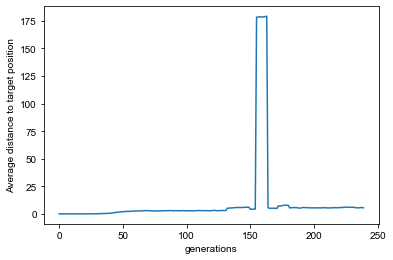

In [17]:
ax = sns.lineplot(x=result_df.T.columns, y=result_df['mean'], markers=True, dashes=True)
ax.set(ylabel='Average distance to target position')
sns.set(rc={'figure.figsize':(15,9)})
ax.figure.savefig("output.png")
plt.show()

<AxesSubplot:xlabel='generations'>

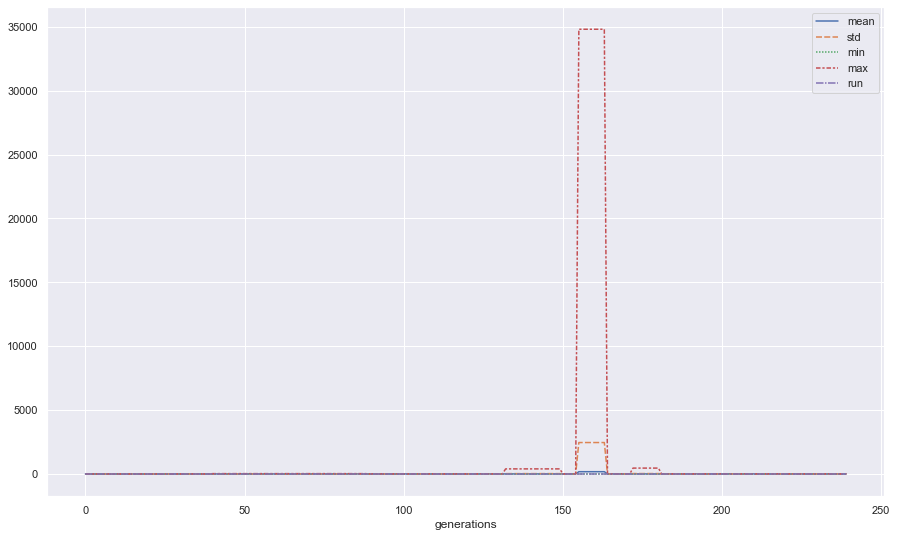

In [18]:
sns.lineplot(data=result_df)

In [19]:
formated_fitness_df = cp.deepcopy(fitness_df)
formated_fitness_df.set_axis([i for i in range(len(fitness_df.T))], axis=1, inplace=True)
formated_fitness_df.rename(columns={len(fitness_df.T)-1 : 'run'}, inplace=True)
formated_fitness_df

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,run
0,-0.088951,-0.002590,-0.040098,-0.005483,-0.029379,-0.000734,-0.010363,-0.014694,-0.027739,-0.002381,...,7.590477,7.258681,7.434404,7.624779,7.401598,0.288344,7.185901,7.307899,0.123736,1.0
1,-0.059256,-0.056486,-0.030750,0.024387,0.001262,0.006235,0.000823,-0.003676,-0.000494,-0.000617,...,4.915855,7.708360,7.478941,5.678985,4.148544,7.589697,-0.020527,7.284227,7.870596,1.0
2,-0.071240,-0.084405,0.022559,-0.018689,-0.004681,-0.007019,0.002189,-0.004451,0.001010,-0.003402,...,7.159810,7.822590,7.565414,2.860126,6.624228,7.587061,7.695986,7.184798,-0.056642,1.0
3,-0.191424,-0.077983,0.000189,0.022559,0.033463,-0.009579,-0.008271,0.009098,-0.003267,0.001130,...,6.959238,7.722850,6.752748,7.184798,5.678985,7.544274,7.401943,7.253811,3.583927,1.0
4,-0.007151,-0.001691,-0.067827,-0.021183,0.013262,0.024694,-0.007490,-0.003207,-0.005070,-0.008150,...,6.868900,7.049353,-0.004210,7.390871,7.400041,7.937792,7.782742,7.604608,7.130818,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.035206,-0.032676,-0.009413,-0.038283,-0.009707,-0.019518,-0.028150,-0.136252,-0.006619,-0.011724,...,7.469189,1.885616,1.216084,0.864678,7.049388,4.845484,7.552371,3.147775,-0.065869,1.0
196,-0.064365,-0.014507,-0.060150,-0.051966,-0.008271,-0.009308,-0.006262,-0.007348,-0.001691,0.098590,...,2.871416,-0.000636,7.257794,7.199542,0.979601,-0.228144,7.937792,7.766756,5.771977,1.0
197,0.003861,-0.065368,-0.012530,-0.032802,-0.026130,-0.029924,-0.032951,-0.004681,-0.016346,-0.038394,...,7.728217,0.240854,-0.556829,0.002345,7.281422,-1.119570,6.674035,6.909029,0.343882,1.0
198,-0.031170,0.044941,-0.019191,-0.034815,-0.002544,-0.042802,-0.032846,-0.019776,-0.019851,-0.011109,...,-0.012075,-0.012075,-0.418684,7.300715,7.496380,5.329580,5.471547,7.293076,0.668777,1.0


In [20]:
melted_formated_fitness = formated_fitness_df.melt(id_vars='run')
melted_formated_fitness.rename(columns={'variable':'generation', 'value':'fitness'}, inplace=True)
melted_formated_fitness.head(3)

,run,generation,fitness
0,1.0,0,-0.088951
1,1.0,0,-0.059256
2,1.0,0,-0.071240


<AxesSubplot:xlabel='generation', ylabel='fitness'>

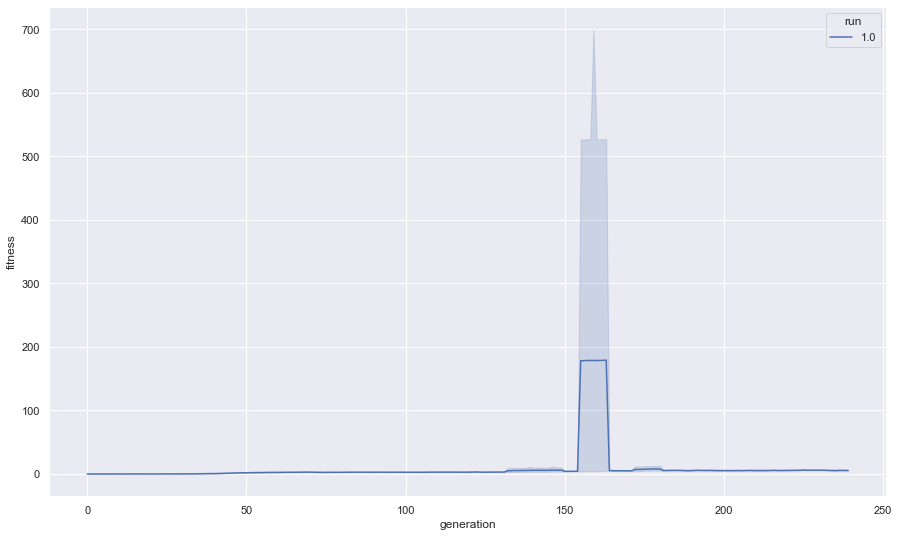

In [21]:
sns.lineplot(data=melted_formated_fitness, x='generation', hue='run', y='fitness')

In [22]:
# TODO: create boxplots over individual performance

In [32]:
fitness_mean = []
fitness_std = []
for i, val in enumerate(generation_identifiers):
    merged_gen = pd.merge(
        left=val,
        right=fitness_run_1,
        how="inner",
        on=None,
        left_on="generation_"+str(i),
        right_on="Individual_ID",
        left_index=False,
        right_index=False,
        sort=True,
        suffixes=("_x", "_y"),
        copy=True,
        indicator=False,
        validate=None,
    )
    gen_mean = merged_gen["Distance to Target"].mean()  
    gen_std = merged_gen["Distance to Target"].std()
    fitness_mean.append(gen_mean)
    fitness_std.append(gen_mean)

NameError: name 'fitness_run_1' is not defined

In [33]:
import matplotlib.pyplot as plt

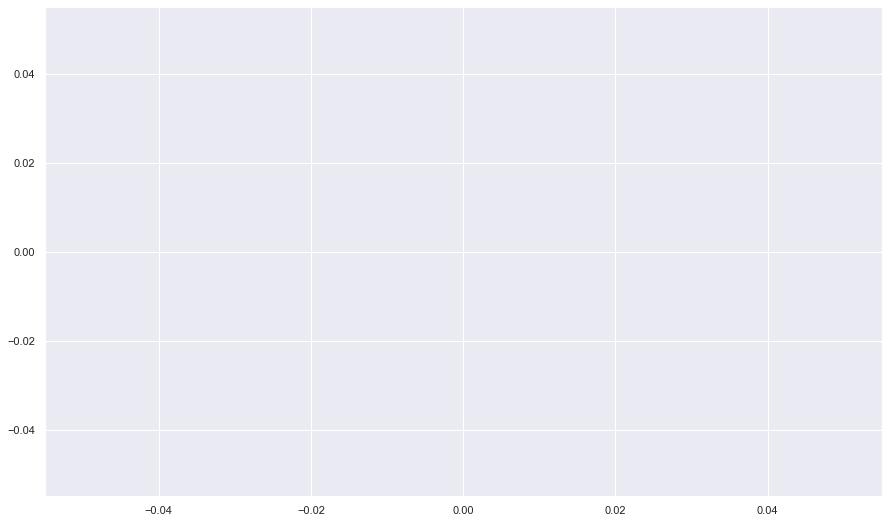

In [34]:
plt.errorbar(list(range(1,len(fitness_mean)+1)), fitness_mean, fitness_std,linestyle='None', marker='^')
plt.show()

In [23]:
max((result_df['max']))

34807.55248059303

In [31]:
np.where(fitness_values['1']['Distance to Target'] > 10)

(array([ 4184, 13340, 15627, 17333, 24371]),)

In [29]:
np.where(fitness_values['1']['Distance to Target'] > 1.45)

(array([ 625, 1704, 2272]),)

In [36]:
run_1_best = fitness_run_1.T[40]
run_2_best = fitness_run_2.T[40]
run_3_best = fitness_run_3.T[40]


NameError: name 'fitness_run_1' is not defined

In [753]:
run_1_best['run'] = 1
run_2_best['run'] = 2
run_3_best['run'] = 3

In [754]:
best_pheno_df = pd.DataFrame(run_1_best).T.append(run_2_best).append(run_3_best)

In [784]:
best_pheno_df = best_pheno_df.reset_index(drop=True)

In [760]:
best = best_pheno_df['Distance to Target'].mean()
std = best_pheno_df['Distance to Target'].std()

In [785]:
fit = best_pheno_df['Distance to Target']
fit

0   -19.078790
1   -20.099967
2   -20.092420
Name: Distance to Target, dtype: float64

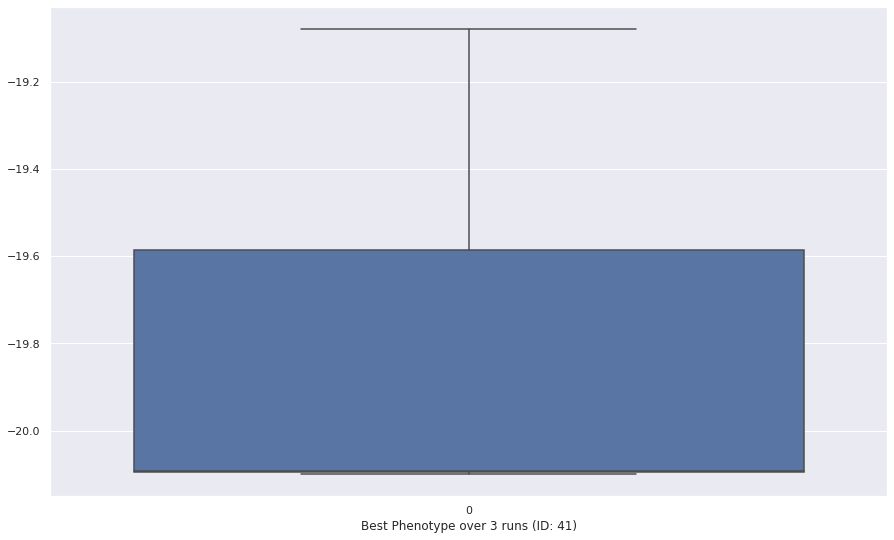

In [807]:
ax = sns.boxplot(data=best_pheno_df['Distance to Target'])
ax.set(xlabel='Best Phenotype over 3 runs (ID: 41)')
ax.figure.savefig('best_phenotype_41.png')